In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt 
from matplotlib.collections import LineCollection

import seaborn as sns 
import plotly.express as px

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_excel("traitementdonnee.xlsx")

In [3]:
df.isna().sum()

Unnamed: 0                                        0
Zone                                              0
Disponibilité alimentaire (Kcal/personne/jour)    0
Disponibilité intérieure                          0
Importations - Quantité                           0
Nourriture                                        0
Production                                        0
Variation de stock                                0
Population                                        0
stabilite pol                                     0
dtype: int64

In [4]:
df.set_index('Zone',inplace=True)

In [5]:
df.drop(columns ='Unnamed: 0',inplace=True)

# Je centre puis réduit mes donnée 

J'ai des donnée de différente unité en centent puis réduire sa me permet d'avoir une unité pour tout les colonne 
je centre et réduit, la formule brute : x-x.mean() pour centré puis (x-x.mean())/x.std() pour réduire 

In [6]:
X =df.copy()
scaler = MinMaxScaler()

In [7]:
scaler.fit(X)

MinMaxScaler()

In [8]:
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.describe().round(2)

,0,1,2,3,4,5,6,7
count,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00
mean,0.31,0.04,0.08,0.04,0.03,0.13,0.03,0.63
std,0.25,0.12,0.17,0.12,0.11,0.08,0.11,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.09,0.00,0.00,0.00,0.00,0.12,0.00,0.51
50%,0.26,0.01,0.01,0.01,0.00,0.12,0.01,0.64
75%,0.44,0.02,0.08,0.02,0.02,0.13,0.02,0.79
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [9]:
X_scaled

,0,1,2,3,4,5,6,7
0,0.588477,0.115856,0.480823,0.112333,0.076070,0.121677,0.040084,0.585903
1,0.090535,0.015057,0.001871,0.014477,0.012549,0.121677,0.029091,0.444934
2,0.144033,0.017357,0.259121,0.017295,0.001917,0.121677,0.020947,0.563877
3,0.958848,0.000274,0.006548,0.000166,0.000000,0.121677,0.000031,0.812775
4,0.748971,0.001314,0.022451,0.000774,0.000274,0.125767,0.000232,0.865639
...,...,...,...,...,...,...,...,...
166,0.061728,0.001369,0.008419,0.001326,0.000913,0.123722,0.004015,0.618943
167,0.292181,0.091546,0.002806,0.092386,0.100027,0.215746,0.057049,0.253304
168,0.320988,0.055136,0.113190,0.055476,0.055261,0.171779,0.031271,0.235683
169,0.135802,0.001697,0.002806,0.001602,0.001506,0.121677,0.002382,0.878855


In [10]:
df

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population,stabilite pol
Zone,,,,,,,,
Afrique du Sud,143,2118.0,514.0,2035.0,1667.0,0.0,57009756.0,-0.28
Algérie,22,277.0,2.0,264.0,275.0,0.0,41389189.0,-0.92
Angola,35,319.0,277.0,315.0,42.0,0.0,29816766.0,-0.38
Antigua-et-Barbuda,233,7.0,7.0,5.0,0.0,0.0,95426.0,0.75
Bahamas,182,26.0,24.0,16.0,6.0,4.0,381755.0,0.99
...,...,...,...,...,...,...,...,...
Turkménistan,15,27.0,9.0,26.0,20.0,2.0,5757667.0,-0.13
Turquie,71,1674.0,3.0,1674.0,2192.0,92.0,81116450.0,-1.79
Ukraine,78,1009.0,121.0,1006.0,1211.0,49.0,44487709.0,-1.87


In [11]:
features = ['Disponibilité alimentaire (Kcal/personne/jour)',
    'Disponibilité intérieure', 'Importations - Quantité', 'Nourriture',
    'Production', 'Variation de stock', 'Population', 'stabilite pol']

In [12]:
X_scaled.columns = features
X_scaled.index = df.index
X_scaled.shape

(171, 8)

In [13]:
X_scaled.describe()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population,stabilite pol
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.306404,0.037251,0.081445,0.035924,0.032813,0.134622,0.030022,0.630447
std,0.249936,0.119343,0.171508,0.117654,0.113080,0.075439,0.108028,0.195853
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090535,0.001588,0.002806,0.001492,0.000662,0.121677,0.001979,0.509912
50%,0.259259,0.005475,0.014967,0.005470,0.003286,0.121677,0.006811,0.636564
75%,0.436214,0.020341,0.077643,0.020665,0.021813,0.129857,0.020801,0.785242
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Classification ascendente hiérarchique

In [14]:
Z = linkage(X_scaled, method="ward")
pd.DataFrame(Z)

,0,1,2,3
0,48.0,70.0,0.007923,2.0
1,105.0,152.0,0.010126,2.0
2,51.0,58.0,0.011367,2.0
3,12.0,76.0,0.013499,2.0
4,13.0,110.0,0.014244,2.0
...,...,...,...,...
165,329.0,334.0,1.891423,94.0
166,326.0,331.0,1.988598,66.0
167,335.0,337.0,2.736674,74.0
168,333.0,338.0,3.597621,77.0


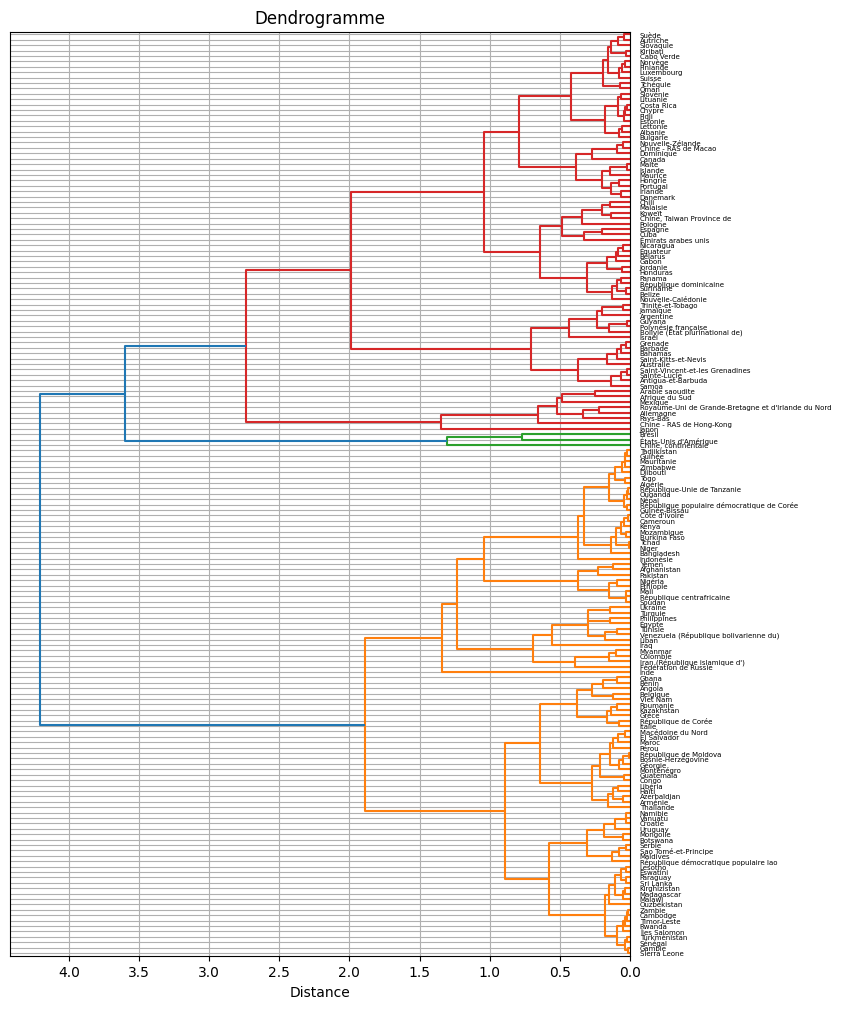

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 12))

_=dendrogram(Z , ax = ax, labels = df.index, orientation='left')

plt.title("Dendrogramme")
plt.xlabel("Distance")
plt.ylabel('')
plt.grid()
plt.show()

In [16]:
cah = AgglomerativeClustering(n_clusters=5, linkage="ward")
cah.fit(X_scaled)

AgglomerativeClustering(n_clusters=5)

In [17]:
cah.labels_

array([1, 0, 0, 4, 4, 0, 4, 3, 4, 0, 0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 3, 3,
       3, 0, 3, 0, 3, 4, 0, 0, 0, 3, 0, 0, 0, 0, 3, 4, 0, 3, 0, 0, 0, 3,
       1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 3, 0, 0, 4, 4, 4, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 3, 2, 3, 0, 4, 4, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 1, 1, 4, 0, 4, 3, 0, 3, 0, 0, 0, 2, 3, 3, 3,
       0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 1, 3, 0,
       3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 1, 3, 0, 0, 0,
       0, 0, 1, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
dd = {i:j for i,j in enumerate(list("abcde"))}
labels = [dd[i] for i in cah.labels_]
labels[:10]

['b', 'a', 'a', 'e', 'e', 'a', 'e', 'd', 'e', 'a']

In [19]:
X_scaled["cluster"] = labels
X_scaled.shape

(171, 9)

Groupement des cluster pour récupéré la moyenne 

In [20]:
group_means = X_scaled.groupby('cluster').mean()

In [21]:
fig = go.Figure()
for index,row in group_means.iterrows():
        fig.add_trace(go.Scatterpolar(
        r=row,
        theta=group_means.columns,
        fill='toself',
        name=index
    ))
        fig.update_layout(
    title=dict(text ="Cluster obtenus avec la classification H",font = dict(size=20))
    )

fig.show()

In [22]:
X_scaled.describe()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population,stabilite pol
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.306404,0.037251,0.081445,0.035924,0.032813,0.134622,0.030022,0.630447
std,0.249936,0.119343,0.171508,0.117654,0.113080,0.075439,0.108028,0.195853
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090535,0.001588,0.002806,0.001492,0.000662,0.121677,0.001979,0.509912
50%,0.259259,0.005475,0.014967,0.005470,0.003286,0.121677,0.006811,0.636564
75%,0.436214,0.020341,0.077643,0.020665,0.021813,0.129857,0.020801,0.785242
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
# X_scaled[X_scaled['cluster']=="c"]

## Représentatin des pays du groupe choisi

In [24]:
groupe_ = X_scaled[X_scaled['cluster']=="b"]
groupe_.drop(columns='cluster',inplace=True)

C:\Users\ikram\AppData\Local\Temp\ipykernel_11204\2305848889.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
fig = go.Figure()
for index,row in groupe_.iterrows():
    fig.add_trace(go.Scatterpolar(
        r = row,
        theta = groupe_.columns,
        fill = 'toself',
        name = index
    ))

fig.update_layout(
    title=dict(text ="Pays",font = dict(size=50))
    )
fig.show()

In [26]:
groupe_.index

Index(['Afrique du Sud', 'Chine - RAS de Hong-Kong', 'Mexique', 'Allemagne',
       'Arabie saoudite', 'Japon', 'Pays-Bas',
       'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord'],
      dtype='object', name='Zone')

In [27]:
df.loc[groupe_.index]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population,stabilite pol
Zone,,,,,,,,
Afrique du Sud,143,2118.0,514.0,2035.0,1667.0,0.0,57009756.0,-0.280000
Chine - RAS de Hong-Kong,210,280.0,907.0,391.0,24.0,-12.0,7306322.0,0.830000
Mexique,123,4219.0,972.0,4058.0,3249.0,-6.0,124777324.0,-0.800000
Allemagne,71,1739.0,842.0,1609.0,1514.0,-29.0,82658409.0,0.590000
Arabie saoudite,151,1435.0,722.0,1435.0,616.0,-108.0,33101179.0,-0.640000
Japon,67,2415.0,1069.0,2359.0,2215.0,859.0,127502725.0,1.110000
Pays-Bas,70,372.0,608.0,346.0,1100.0,-82.0,17021347.0,-0.077771
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,120,2234.0,779.0,2131.0,1814.0,0.0,66727461.0,0.390000


# K_means

In [28]:
Y_scaled = X_scaled.copy()
Y_scaled.drop(columns='cluster',inplace=True)
Y_scaled.shape

(171, 8)

In [29]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Y_scaled)

c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [30]:
kmeans.inertia_

16.617991191000158

La méthode du coude

In [31]:
inertia = []
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [32]:
for i in k_list :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Y_scaled) 
    inertia.append(kmeans.inertia_)
    print(inertia)

c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[32.04068762596037]
[32.04068762596037, 23.006190273377182]
[32.04068762596037, 23.006190273377182, 16.617991191000158]


c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[32.04068762596037, 23.006190273377182, 16.617991191000158, 12.947229363483164]
[32.04068762596037, 23.006190273377182, 16.617991191000158, 12.947229363483164, 10.218062580713811]
[32.04068762596037, 23.006190273377182, 16.617991191000158, 12.947229363483164, 10.218062580713811, 8.862468596429096]


c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[32.04068762596037, 23.006190273377182, 16.617991191000158, 12.947229363483164, 10.218062580713811, 8.862468596429096, 7.9298924431463815]
[32.04068762596037, 23.006190273377182, 16.617991191000158, 12.947229363483164, 10.218062580713811, 8.862468596429096, 7.9298924431463815, 7.052699831471589]


c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[32.04068762596037, 23.006190273377182, 16.617991191000158, 12.947229363483164, 10.218062580713811, 8.862468596429096, 7.9298924431463815, 7.052699831471589, 6.129795498260943]


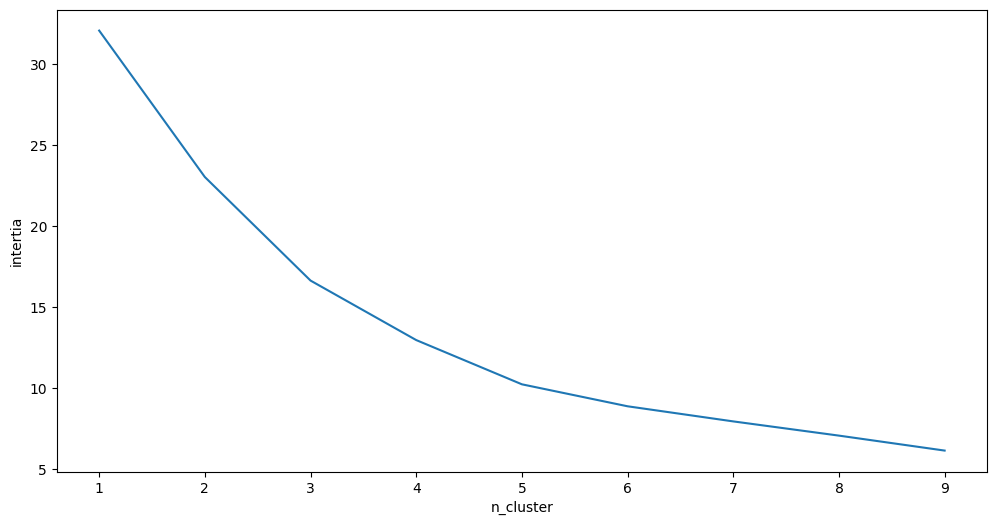

In [33]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, inertia)
plt.show()

In [34]:
kmeans = KMeans(n_clusters=5,random_state = 0)
kmeans.fit(Y_scaled)

c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=0)

In [35]:
kmeans.labels_

array([2, 4, 4, 1, 1, 4, 1, 0, 1, 0, 4, 0, 4, 4, 2, 1, 3, 0, 0, 4, 0, 0,
       1, 4, 0, 4, 0, 1, 4, 4, 4, 0, 4, 4, 4, 4, 0, 1, 4, 0, 4, 4, 0, 1,
       2, 4, 4, 4, 4, 4, 1, 4, 4, 0, 4, 1, 4, 0, 4, 4, 1, 1, 1, 1, 0, 4,
       4, 4, 4, 4, 4, 4, 1, 0, 4, 0, 4, 4, 0, 3, 0, 0, 1, 1, 0, 4, 1, 1,
       0, 0, 0, 0, 0, 4, 0, 2, 2, 1, 4, 1, 0, 4, 0, 0, 0, 4, 3, 0, 1, 1,
       4, 0, 0, 4, 0, 2, 0, 0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 0, 0, 2, 0, 4,
       0, 4, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 1, 4, 4, 2, 0, 0, 4, 0,
       4, 0, 2, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 4])

In [36]:
dd = {i:j for i,j in enumerate(list("abcde"))}
labels = [dd[i] for i in kmeans.labels_]
labels[:10]
Y_scaled['cluster'] =labels

In [37]:
Y_scaled.columns

Index(['Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité intérieure', 'Importations - Quantité', 'Nourriture',
       'Production', 'Variation de stock', 'Population', 'stabilite pol',
       'cluster'],
      dtype='object')

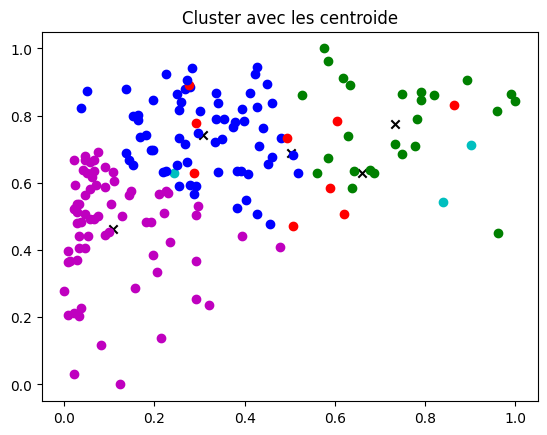

In [38]:
centers = np.array(kmeans.cluster_centers_)
plt.plot()
colors = ['b','g','r','c','m']
for i, l in enumerate(kmeans.labels_):
    plt.plot(Y_scaled['Disponibilité alimentaire (Kcal/personne/jour)'][i], Y_scaled['stabilite pol'][i], marker ='o',color=colors[l])
plt.scatter(centers[:,0], centers[:,7], marker="x", color='k')
plt.title('Cluster avec les centroide')
plt.show()

In [39]:
means_cluster = Y_scaled.groupby("cluster").mean()

In [40]:
means_cluster

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population,stabilite pol
cluster,,,,,,,,
a,0.308579,0.018736,0.061554,0.017424,0.016431,0.139001,0.009550,0.743213
b,0.734156,0.019021,0.028251,0.017761,0.016464,0.139468,0.005369,0.775458
c,0.503887,0.092507,0.711568,0.090605,0.062096,0.189389,0.041061,0.690216
d,0.661180,0.846894,0.180231,0.839761,0.826732,0.131902,0.458322,0.628651
e,0.108189,0.018889,0.032972,0.017850,0.015830,0.121716,0.038179,0.463960


In [41]:
fig = go.Figure()
for index,val in means_cluster.iterrows():
    fig.add_trace(go.Scatterpolar(
    r=val,
    theta=means_cluster.columns,
    fill='toself',
    name=index
))
    fig.update_layout(
    title=dict(text ="Cluster obtenue avec le k_means",font = dict(size=30))
    )
fig.show()



In [42]:
cluster_= Y_scaled[Y_scaled['cluster'] == 'c']
cluster_.drop(columns='cluster',inplace=True)

C:\Users\ikram\AppData\Local\Temp\ipykernel_11204\2296339962.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
fig = go.Figure()
for index,val in cluster_.iterrows():
    fig.add_trace(go.Scatterpolar(
        r = val,
        theta = cluster_.columns,
        fill = 'toself',
        name = index
    ))

fig.update_layout(
    title=dict(text ="Pays",font = dict(size=50))
    )
fig.show()

In [44]:
df.loc[cluster_.index]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population,stabilite pol
Zone,,,,,,,,
Afrique du Sud,143,2118.0,514.0,2035.0,1667.0,0.0,57009756.0,-0.280000
Chine - RAS de Hong-Kong,210,280.0,907.0,391.0,24.0,-12.0,7306322.0,0.830000
Mexique,123,4219.0,972.0,4058.0,3249.0,-6.0,124777324.0,-0.800000
Allemagne,71,1739.0,842.0,1609.0,1514.0,-29.0,82658409.0,0.590000
Arabie saoudite,151,1435.0,722.0,1435.0,616.0,-108.0,33101179.0,-0.640000
Émirats arabes unis,147,412.0,433.0,412.0,48.0,-26.0,9487203.0,0.620000
Japon,67,2415.0,1069.0,2359.0,2215.0,859.0,127502725.0,1.110000
Pays-Bas,70,372.0,608.0,346.0,1100.0,-82.0,17021347.0,-0.077771
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,120,2234.0,779.0,2131.0,1814.0,0.0,66727461.0,0.390000


# ACP

In [45]:
A = df.copy()
A[:10]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population,stabilite pol
Zone,,,,,,,,
Afrique du Sud,143,2118.0,514.0,2035.0,1667.0,0.0,57009756.0,-0.28
Algérie,22,277.0,2.0,264.0,275.0,0.0,41389189.0,-0.92
Angola,35,319.0,277.0,315.0,42.0,0.0,29816766.0,-0.38
Antigua-et-Barbuda,233,7.0,7.0,5.0,0.0,0.0,95426.0,0.75
Bahamas,182,26.0,24.0,16.0,6.0,4.0,381755.0,0.99
Bangladesh,7,250.0,0.0,240.0,249.0,0.0,159685424.0,-1.26
Barbade,199,17.0,2.0,13.0,15.0,0.0,286232.0,0.97
Belize,110,19.0,0.0,10.0,20.0,1.0,375769.0,0.04
Bolivie (État plurinational de),155,429.0,1.0,403.0,533.0,103.0,11192855.0,-0.28


In [46]:
n_components = 8
scaler.fit(A)

MinMaxScaler()

In [47]:
acp_scaled = scaler.transform(A)
acp_scaled[:10]
acp_scaled.shape

(171, 8)

In [48]:
pd.DataFrame(acp_scaled).describe().round(2).iloc[1:3:, : ]

,0,1,2,3,4,5,6,7
mean,0.31,0.04,0.08,0.04,0.03,0.13,0.03,0.63
std,0.25,0.12,0.17,0.12,0.11,0.08,0.11,0.20


In [49]:
pca = PCA(n_components=n_components)
pca.fit(acp_scaled)

PCA(n_components=8)

In [50]:
pca.explained_variance_ratio_

array([4.19288583e-01, 2.61618754e-01, 1.39955495e-01, 1.23930761e-01,
       3.20443618e-02, 2.24479294e-02, 6.43298169e-04, 7.08172171e-05])

In [51]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_components+1)

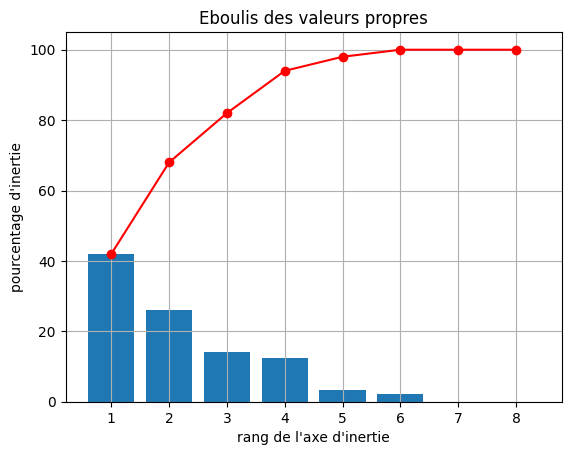

In [52]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.grid()
plt.show(block=False)

In [53]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
features = df.columns

In [54]:
pcs.columns = features
pcs.index = [f'F{i}' for i in x_list]
pcs.round(2)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population,stabilite pol
F1,0.83,0.16,0.19,0.15,0.15,0.04,0.02,0.44
F2,-0.12,0.47,0.29,0.46,0.43,0.01,0.36,-0.39
F3,-0.30,-0.10,0.87,-0.10,-0.14,0.16,-0.05,0.30
F4,-0.43,0.19,-0.32,0.18,0.19,0.02,0.20,0.75
F5,0.06,-0.14,0.10,-0.16,-0.24,-0.64,0.69,0.04
F6,0.09,-0.13,-0.11,-0.15,-0.16,0.75,0.59,-0.06
F7,-0.00,-0.40,0.04,-0.42,0.81,-0.03,0.07,-0.00
F8,-0.00,0.71,-0.00,-0.70,-0.01,-0.00,-0.03,-0.00


In [55]:
pcs.T

,F1,F2,F3,F4,F5,F6,F7,F8
Disponibilité alimentaire (Kcal/personne/jour),0.833632,-0.120296,-0.300400,-0.433896,0.063628,0.089622,-0.000076,-0.000420
Disponibilité intérieure,0.155052,0.472519,-0.102282,0.190788,-0.136481,-0.127244,-0.401698,0.713893
Importations - Quantité,0.191221,0.291666,0.866332,-0.321977,0.098407,-0.112006,0.043987,-0.000812
Nourriture,0.154807,0.463426,-0.101823,0.184758,-0.163968,-0.151957,-0.421026,-0.699663
Production,0.147123,0.431030,-0.140814,0.192964,-0.235763,-0.159676,0.808931,-0.007352
Variation de stock,0.037812,0.010509,0.164914,0.015929,-0.641384,0.747603,-0.026933,-0.000318
Population,0.019913,0.356907,-0.054713,0.200495,0.686861,0.593408,0.065921,-0.027804
stabilite pol,0.443864,-0.386189,0.297288,0.748226,0.044938,-0.060004,-0.000435,-0.000507


## Heatmap

<AxesSubplot: >

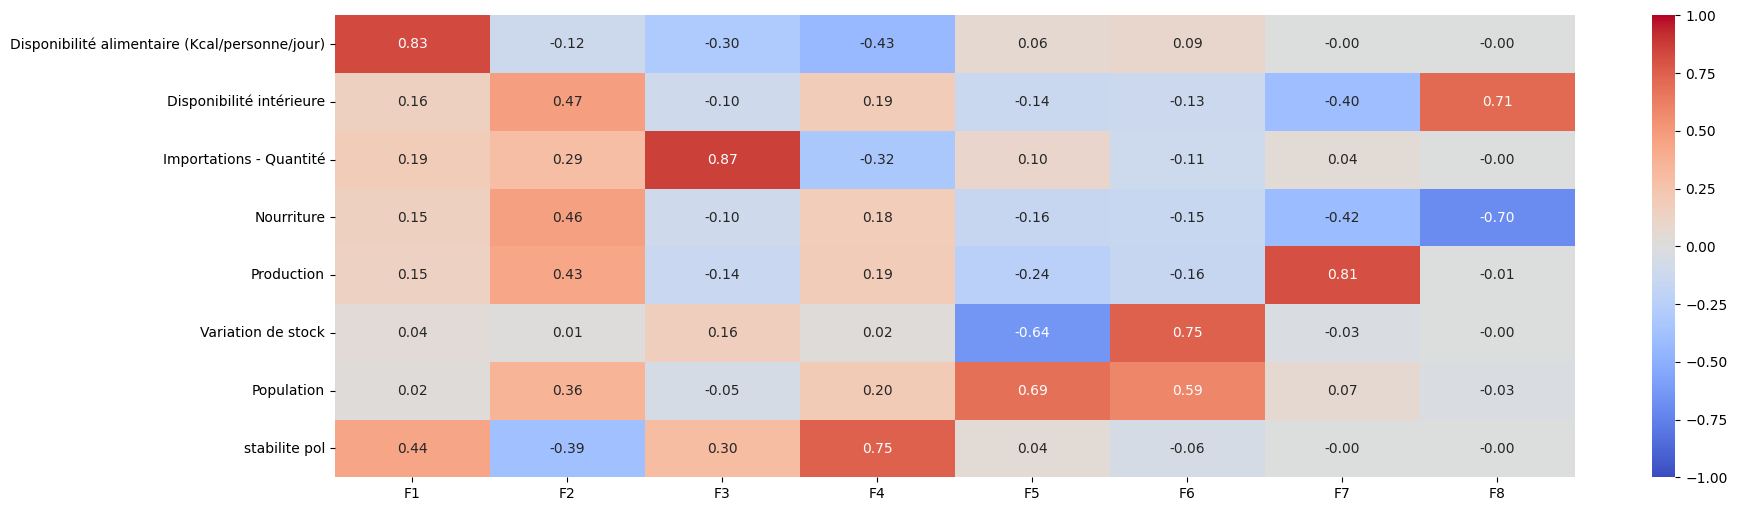

In [56]:
fig, ax = plt.subplots(figsize=(20,6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

Text(0.5, 1.0, 'Matrice de corrélation')

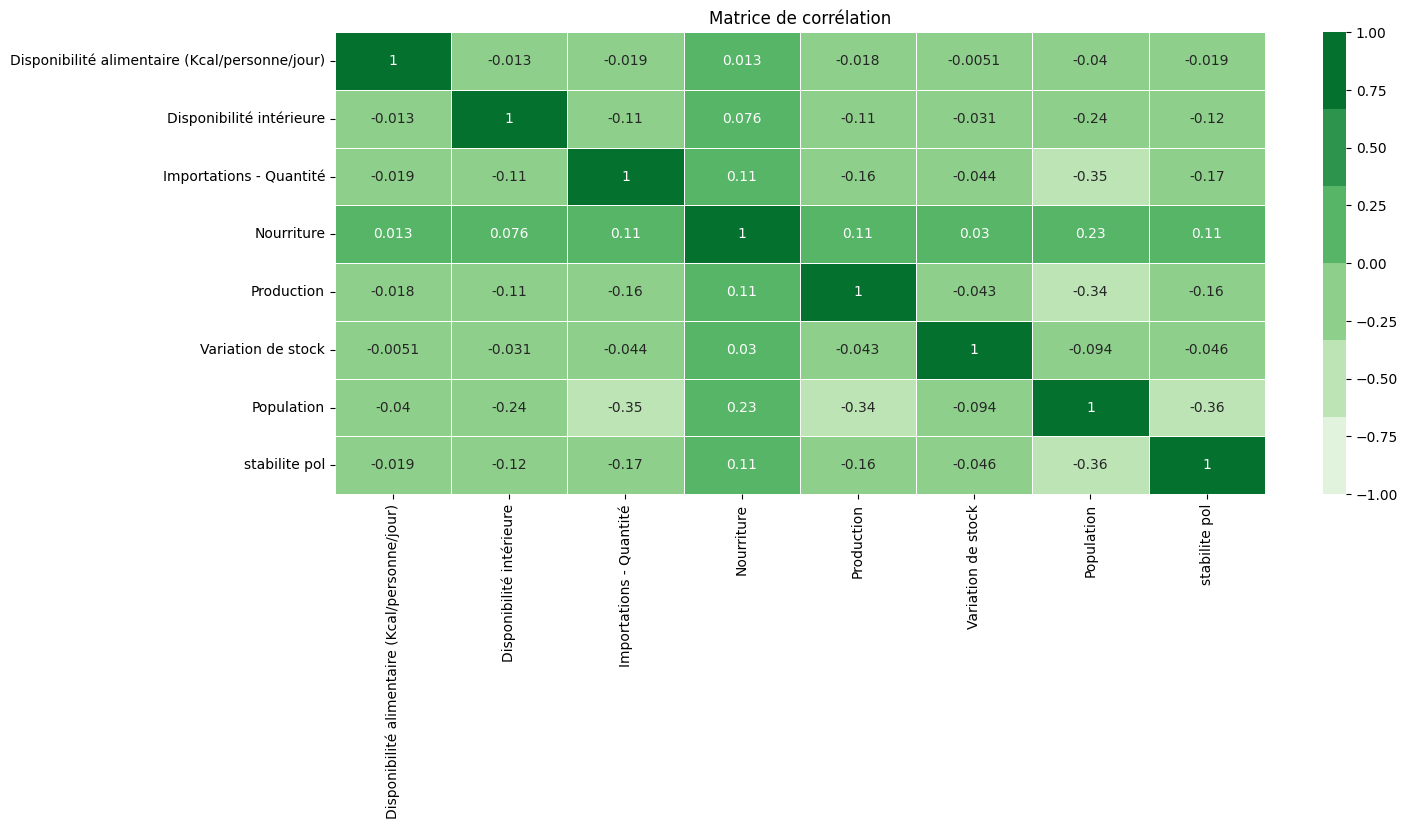

In [57]:
colormap = sns.color_palette("Greens")
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(pcs.corr(),cmap = colormap,linewidth=.5,annot = True,vmax = 1,vmin = -1)
plt.title('Matrice de corrélation')

In [58]:
acp_cluster = X_scaled.set_index('cluster')
X_proj = pca.transform(acp_cluster)
X_proj[:5]

c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but PCA was fitted without feature names



array([[ 3.21834878e-01,  1.94407695e-01,  2.23419802e-01,
        -2.45037823e-01,  3.70058578e-02, -4.90077148e-02,
        -1.01763369e-02,  1.64136962e-03],
       [-2.87764597e-01,  4.47730133e-02, -5.40183040e-02,
        -3.20198503e-02, -1.09163323e-02, -2.14632242e-04,
        -1.56249305e-03, -4.10285344e-04],
       [-1.42114858e-01,  6.23370646e-02,  1.89555524e-01,
        -5.17900901e-02,  1.92848466e-02, -3.52263931e-02,
        -1.55072841e-03, -7.27239936e-04],
       [ 5.93321926e-01, -2.29771759e-01, -1.95126326e-01,
        -1.48767136e-01,  4.86851636e-02,  4.38246910e-02,
        -1.68626303e-03, -6.05794092e-04],
       [ 4.45321563e-01, -2.19295353e-01, -1.02130075e-01,
        -2.27998974e-02,  3.64807124e-02,  2.29706587e-02,
        -1.54290307e-03, -2.48879717e-04]])

In [59]:
def correlation_graph(pca, 
                    x_y, 
                    features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))


    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [60]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="."):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



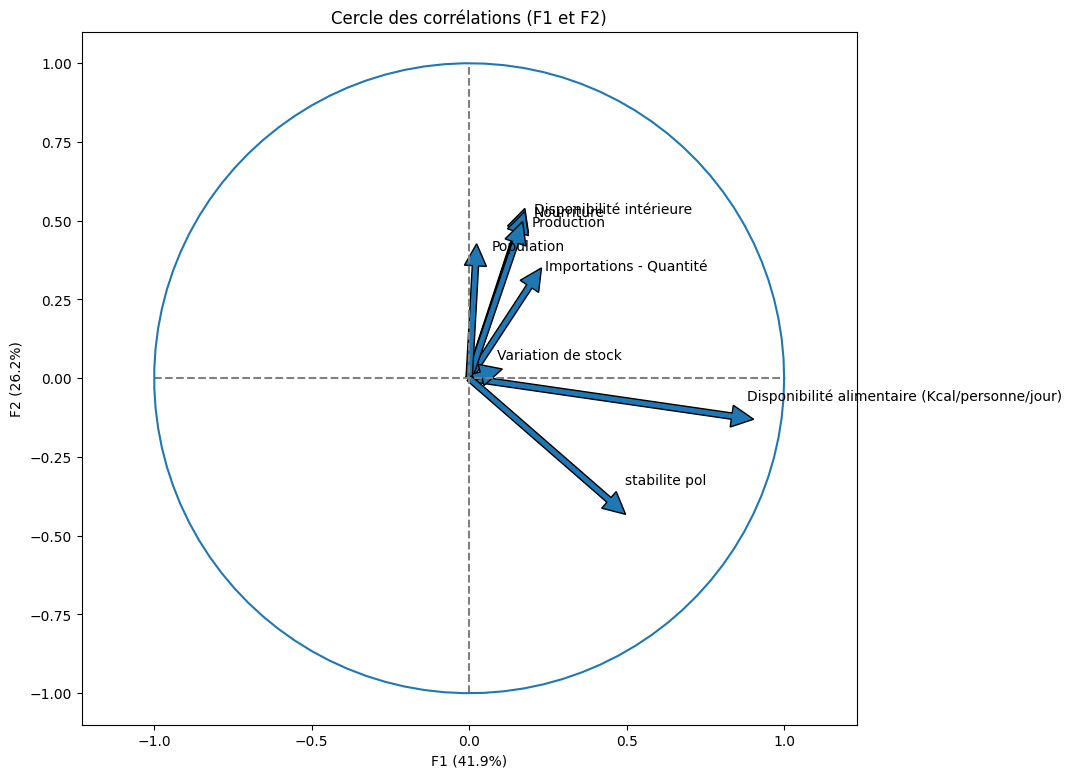

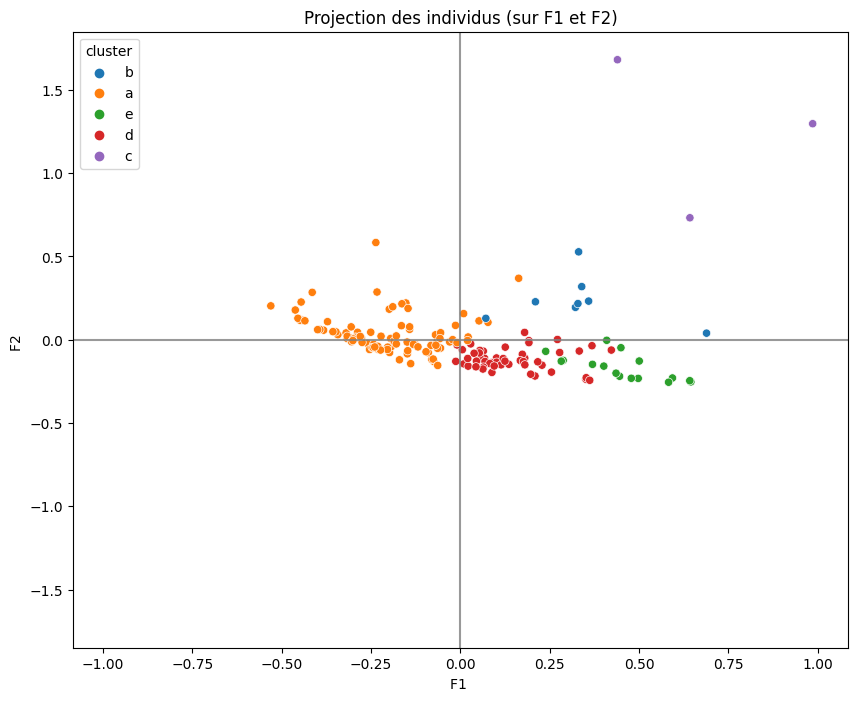

In [61]:
x_y = [0,1]
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, clusters=acp_cluster.index)


In [62]:
acp_cluster_ = X_scaled[X_scaled['cluster']=='b']
acp_cluster_.drop(columns='cluster',inplace=True)
X_proj = pca.transform(acp_cluster_)

C:\Users\ikram\AppData\Local\Temp\ipykernel_11204\2740682205.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but PCA was fitted without feature names



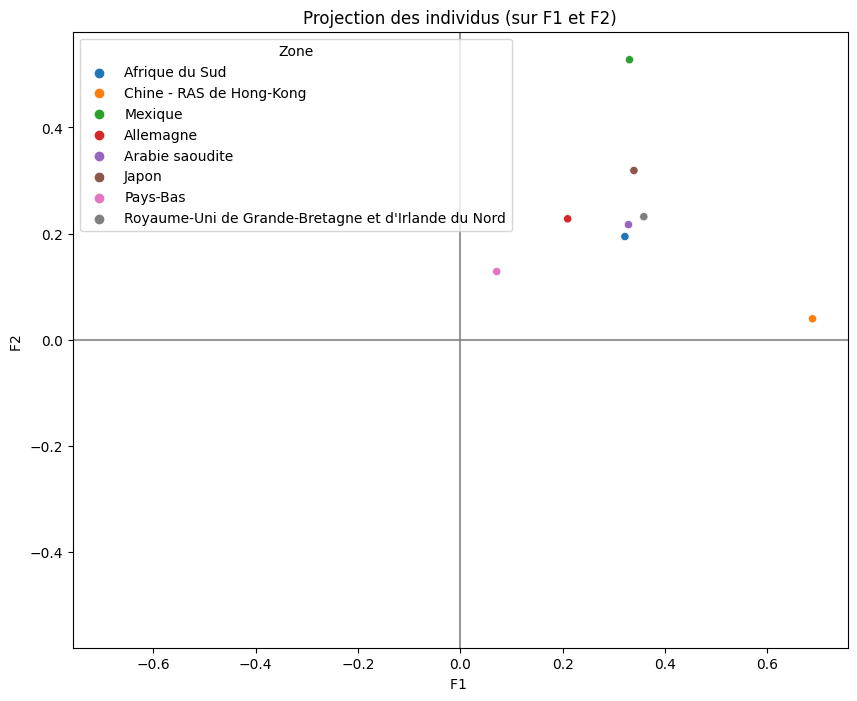

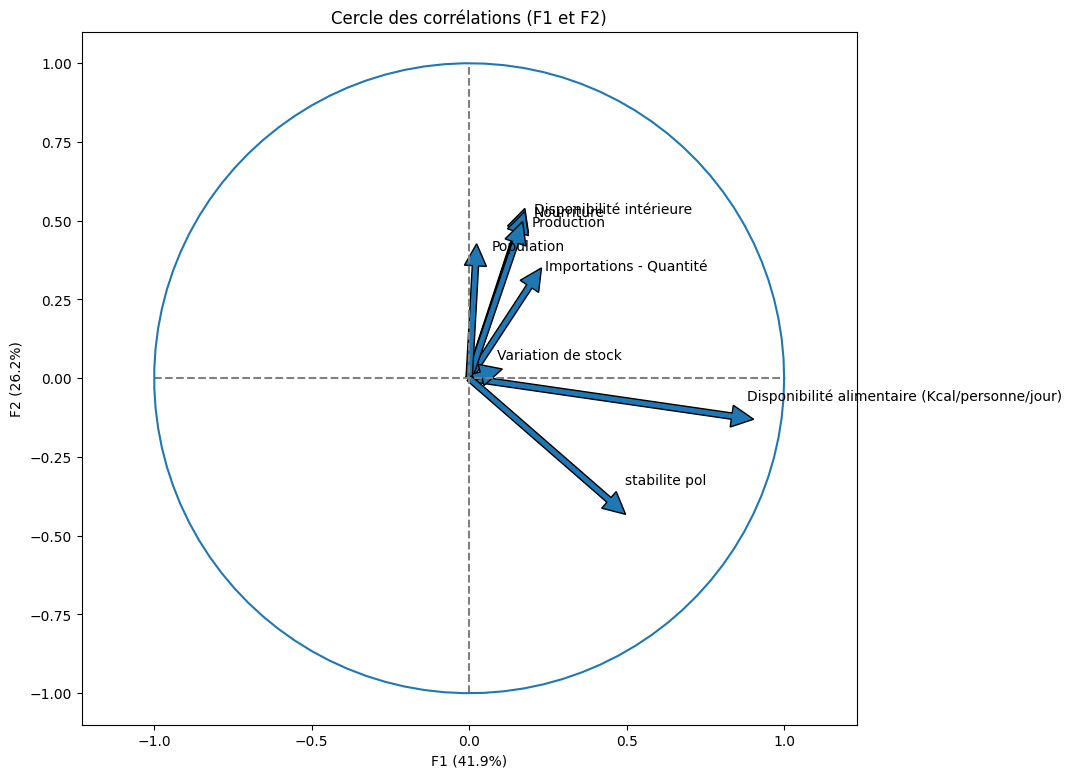

In [63]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=acp_cluster_.index)
correlation_graph(pca, x_y, features)